In [135]:
import numpy as np
import scipy.special
from scipy.stats import binom, norm, chi2, hypergeom, t, fisher_exact 
n, k = 31000, 63
p = .00203
scipy.special.comb(n, k)*p**k*(1-p)**(n-k)

0.05024468664277072

In [19]:
binom.pmf(k, n, p)

0.050244686645578546

In [36]:
30000*0.00203 #/31000

60.900000000000006

In [22]:
n*p + np.sqrt(p*(1-p))*norm.ppf(0.95)

63.004034478034185

In [25]:
binom.ppf(0.95, n, p)

76.0

In [37]:
binom.cdf(49, n, p)

0.04100901205583328

In [35]:
binom.cdf(39, n, p)

0.0008074555188499868

In [40]:
from sympy import *
w, a, b = symbols('w a b')
diff(1/(1+a*(w-b)**2), w)

-a*(-2*b + 2*w)/(a*(-b + w)**2 + 1)**2

In [41]:
diff(1/(1+a*(w-b)**2), w, 2)

2*a*(4*a*(b - w)**2/(a*(b - w)**2 + 1) - 1)/(a*(b - w)**2 + 1)**2

In [45]:
var = {'a':2,'b':2,'w':2}
eval('2*a*(0-1)/(0+1)**2', var)

-4.0

In [46]:
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])

Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])

N = 24

In [47]:
np.mean(Xs), np.mean(Ys)

(0.9199250000000001, 425.6175)

In [48]:
len(Xs)

24

In [52]:
np.cov(Xs, Ys, ddof=1)[0,1]

191.20706528260865

In [50]:
?np.cov

In [59]:
np.corrcoef(Xs, Ys, ddof=1)[0,1]

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


0.8391399162310662

In [61]:
np.corrcoef(Xs, Ys, ddof=1)[0,1] * np.std(Ys, ddof=1) / np.std(Xs, ddof=1)

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


447.8705991409983

In [65]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(Xs.reshape(-1,1), Ys)
reg.coef_

array([447.87059914])

In [67]:
np.mean(Ys) - np.corrcoef(Xs, Ys, ddof=1)[0,1] * np.std(Ys, ddof=1) / np.std(Xs, ddof=1) * np.mean(Xs)

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


13.6101390852171

In [70]:
#dir(reg)
reg.intercept_

13.6101390852171

In [87]:
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

N = 9

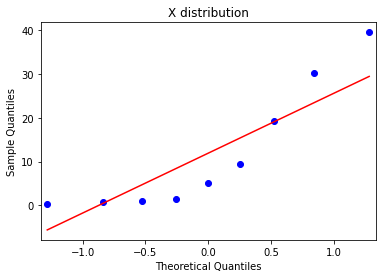

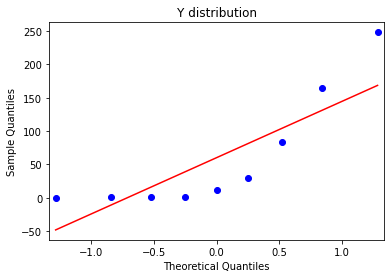

In [88]:
import statsmodels.api as sm
import matplotlib.pylab as plt
sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()
sm.qqplot(Ys, line='s')
plt.title("Y distribution")
plt.show()

In [74]:
np.corrcoef(Xs, Ys, ddof=1)[0,1]

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


0.9888323018726733

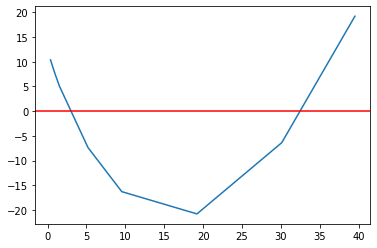

In [85]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(Xs.reshape(-1,1), Ys)
plt.plot(Xs, np.array(Ys)-reg.predict(Xs.reshape(-1,1)))
plt.axhline(0, color='red')

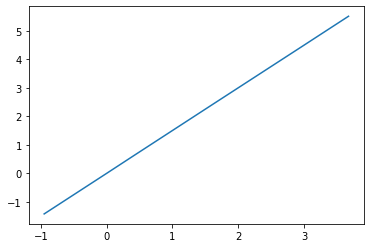

In [90]:
plt.plot(np.log(Xs), np.log(Ys))

In [91]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.log(Xs).reshape(-1,1), np.log(Ys))
reg.coef_, reg.intercept_

(array([1.49953258]), 0.0013370447605027813)

In [92]:
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = 30

In [104]:
X = np.column_stack((LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge))
y = LogPlanetMass

In [105]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.coef_, reg.intercept_

(array([ 1.40214538, -0.14099818, -1.59951364, -0.95610919, -0.46176234]),
 0.15379302910641113)

In [108]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     9.264
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           5.14e-05
Time:                        14:24:51   Log-Likelihood:                -42.078
No. Observations:                  30   AIC:                             96.16
Df Residuals:                      24   BIC:                             104.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1538      1.389      0.111      0.913      -2.713       3.021
x1             1.4021      0.286      4.895      0.000       0.811       1.993
x2            -0.1410      0.360     -0.392      0.699      -0.884       0.602
x3            -1.5995      1.251     -1.279      0.213      -4.181       0.981
x4            -0.9561      1.117     -0.856      0.400      -3.261       1.349
x5            -0.4618      0.372     -1.243      0.226      -1.229       0.305
==============================================================================
Omnibus:                       12.444   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.848
Skew:                           1.274   Prob(JB):                      0.00267
Kurtosis:                       4.729   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
X.shape

(30, 6)

In [100]:
X

array([[ 1.00000000e+00,  3.24977860e-01, -2.63108916e+00,
         1.10000000e-01,  2.70027140e-01,  1.58103844e+00],
       [ 1.00000000e+00,  3.47129530e-01, -3.89026151e+00,
        -2.00000000e-03,  1.91446460e-01,  1.06471074e+00],
       [ 1.00000000e+00,  1.48420010e-01, -3.13752628e+00,
        -4.00000000e-01, -1.63696090e-01,  2.39789527e+00],
       [ 1.00000000e+00,  4.57424850e-01, -2.99633245e+00,
         1.00000000e-02,  4.44685820e-01,  7.27548610e-01],
       [ 1.00000000e+00,  1.88966100e-01, -3.12356565e+00,
         1.50000000e-01,  1.92271890e-01,  5.56754560e-01],
       [ 1.00000000e+00,  6.95260600e-02, -2.33924908e+00,
         2.20000000e-01,  1.29162300e-02,  1.91692261e+00],
       [ 1.00000000e+00,  7.69610400e-02, -2.85076650e+00,
        -1.00000000e-02,  8.61777000e-02,  1.64865863e+00],
       [ 1.00000000e+00,  3.22083500e-01, -3.04765735e+00,
         2.00000000e-02,  1.38021300e-01,  1.38629436e+00],
       [ 1.00000000e+00,  4.29181630e-01, -2.840

In [ ]:
X = np.column_stack((np.ones(len(LogPlanetMass)), LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge))
y = LogPlanetMass

In [103]:
np.round(np.linalg.inv(X.T@X)@(X.T@y), 3)

array([ 0.154,  1.402, -0.141, -1.6  , -0.956, -0.462])

In [113]:
-2 * np.log(binom.pmf(39, 31000, 102/62000) * binom.pmf(63, 31000, 102/62000) / 
           (binom.pmf(39, 31000, 39/31000) * binom.pmf(63, 31000, 63/31000)))

5.709660479762277

In [119]:
1-chi2(1).cdf(5.709660479762277)

0.016871802195941754

In [115]:
?chi2.pdf

In [121]:
hypergeom.cdf(39, 62000, 31000, 102)

0.011094091843958116

In [123]:
#sum([scipy.special.comb(31000, k) * scipy.special.comb(31000, 102-k) / scipy.special.comb(62000, 102) for k in range(39)])

In [127]:
stats.fisher_exact([[39, 63],[30961, 30937]],'less') 

(0.6185677526719483, 0.011094091844052025)

In [128]:
norm.cdf(-3.0268)

0.0012357871459340907

In [131]:
X = [0.9, -0.9, 4.3, 2.9, 1.2, 3.0, 2.7, 0.6, 3.6, -0.5]
np.mean(X), np.std(X, ddof=1)

(1.78, 1.7681126158201075)

In [138]:
n = len(X)
1 - t(n-1).cdf(np.mean(X) / (np.std(X, ddof=1) / np.sqrt(n)))

0.0055606927492846125

In [139]:
np.mean(X) 

1.78

In [140]:
X = np.array([ 0.9, -0.9, 4.3, 2.9, 1.2, 3. , 2.7, 0.6, 3.6, -0.5])
t_stats,p_value = stats.ttest_1samp(X, popmean=0)
p_value=p_value/2

In [141]:
p_value

0.005560692749284678

In [168]:
np.random.seed(1)
n = 100
X = np.random.random((n,2))
beta = np.array([-1, 2])
noise = np.random.normal(loc=0, scale=2, size=n)
y = X@beta + noise

In [169]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
beta_hat = [reg.intercept_] + reg.coef_.tolist()
beta_hat

[0.18444290873001834, -1.5879784718284842, 2.5252138207251904]

In [178]:
# add ones column
X1 = np.column_stack((np.ones(n), X))
# standard deviation of the noise.
sigma_hat = np.sqrt(np.sum(np.square(y - X1@beta_hat)) / (n - X1.shape[1]))
# estimate the covariance matrix for beta 
beta_cov = np.linalg.inv(X1.T@X1)
# the t-test statistic for each variable
t_vals = beta_hat / (sigma_hat * np.sqrt(np.diagonal(beta_cov)))
# compute 2-sided p-values.
p_vals = t.sf(np.abs(t_vals), n-X1.shape[1])*2

In [179]:
t_vals

array([ 0.37424023, -2.36373529,  3.57930174])

In [180]:
p_vals

array([7.09042437e-01, 2.00854025e-02, 5.40073114e-04])

In [181]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.tvalues 
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     8.308
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           0.000467
Time:                        12:16:20   Log-Likelihood:                -213.23
No. Observations:                 100   AIC:                             432.5
Df Residuals:                      97   BIC:                             440.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1844      0.493      0.374      0.709      -0.794       1.163
x1            -1.5880      0.672     -2.364      0.020      -2.921      -0.255
x2             2.5252      0.706      3.579      0.001       1.125       3.925
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.402
Skew:                           0.114   Prob(JB):                        0.818
Kurtosis:                       2.789   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""